In [122]:
import pandas as pd

import rdflib as rdf
from rdflib import URIRef
from rdflib.namespace import RDF, SKOS

import gzip
import pandas as pd
import numpy as np

In [123]:
map = {}

map['http://purl.org/collections/nl/am/t-14592'] = 'Books and documents'
# boekencollectie 	3479
# Book collection

map['http://purl.org/collections/nl/am/t-15459'] = 'Decorative arts'
# meubelcollectie 	3206
# Furniture
    
map['http://purl.org/collections/nl/am/t-15573'] = 'Decorative arts'
# glascollectie 	1028 
# Glass

map['http://purl.org/collections/nl/am/t-15579'] = 'Decorative arts'
# textielcollectie 	7366
# Textiles

map['http://purl.org/collections/nl/am/t-15606'] = 'Decorative arts'
# keramiekcollectie 	5152
    
map['http://purl.org/collections/nl/am/t-16469'] = 'Metallic art'
# onedele metalen collectie 	797
# Non-noble metals

map['http://purl.org/collections/nl/am/t-22503'] = 'Visual art'
# prentencollectie 	22048
# Prints

map['http://purl.org/collections/nl/am/t-22504'] = 'Visual art'
# fotocollectie 	1563
# Photographs

map['http://purl.org/collections/nl/am/t-22505'] = 'Visual art'
# tekeningencollectie 	5455
# Drawings
    
map['http://purl.org/collections/nl/am/t-22506'] = 'Visual art'
# schilderijencollectie 	2672
# Paintings
    
map['http://purl.org/collections/nl/am/t-22507'] = 'Visual art'
# beeldencollectie 	943
# General image collection
    
map['http://purl.org/collections/nl/am/t-22508'] = 'Metallic art'
# edele metalencollectie 	3533
# Noble metals
    
map['http://purl.org/collections/nl/am/t-22509'] = 'Historical artifacts'
# penningen- en muntencollectie 	6440
# Coins etc.
    
map['http://purl.org/collections/nl/am/t-23765'] = 'Books and documents'
# documentencollectie 	533
# Document collection
    
map['http://purl.org/collections/nl/am/t-28650'] = 'Historical artifacts'
# archeologiecollectie 	582
# Archeaological artifacts
    
map['http://purl.org/collections/nl/am/t-31940'] = 'Metallic art'
#-- Onedele collectie 	3
# A small cetegory containing only room numbers from a defunct men's club

map['http://purl.org/collections/nl/am/t-32052'] = 'Historical artifacts'
#-- maten en gewichtencollectie 	536
# Measures and weight

map['http://purl.org/collections/nl/am/t-5504'] = 'Decorative arts'
#-- kunstnijverheidcollectie 	8087
# Arts and crafts

In [124]:
all = pd.read_csv('all.tsv', sep='\t')
#all['cls'] = all.label_original.map(map)
train = pd.read_csv('training.tsv', sep='\t')
val   = pd.read_csv('validation.tsv', sep='\t')
test  = pd.read_csv('test.tsv', sep='\t')



In [125]:
len(all)

73423

In [126]:
all

,Unnamed: 0,instance,label_original,cls_label,cls
0,0,http://purl.org/collections/nl/am/proxy-33634,http://purl.org/collections/nl/am/t-22509,Historical artifacts,2
1,1,http://purl.org/collections/nl/am/proxy-30667,http://purl.org/collections/nl/am/t-22508,Metallic art,3
2,2,http://purl.org/collections/nl/am/proxy-60271,http://purl.org/collections/nl/am/t-22503,Visual art,4
3,3,http://purl.org/collections/nl/am/proxy-52118,http://purl.org/collections/nl/am/t-22503,Visual art,4
4,4,http://purl.org/collections/nl/am/proxy-16319,http://purl.org/collections/nl/am/t-32052,Historical artifacts,2
...,...,...,...,...,...
73418,73418,http://purl.org/collections/nl/am/proxy-27860,http://purl.org/collections/nl/am/t-5504,Decorative arts,1
73419,73419,http://purl.org/collections/nl/am/proxy-23278,http://purl.org/collections/nl/am/t-15606,Decorative arts,1
73420,73420,http://purl.org/collections/nl/am/proxy-29399,http://purl.org/collections/nl/am/t-15606,Decorative arts,1
73421,73421,http://purl.org/collections/nl/am/proxy-3191,http://purl.org/collections/nl/am/t-22503,Visual art,4


In [41]:
all.label_original = pd.Categorical(all.label_original)
for c in all.label_original.cat.categories:
    print(c)

http://purl.org/collections/nl/am/t-14592
http://purl.org/collections/nl/am/t-15459
http://purl.org/collections/nl/am/t-15573
http://purl.org/collections/nl/am/t-15579
http://purl.org/collections/nl/am/t-15606
http://purl.org/collections/nl/am/t-16469
http://purl.org/collections/nl/am/t-22503
http://purl.org/collections/nl/am/t-22504
http://purl.org/collections/nl/am/t-22505
http://purl.org/collections/nl/am/t-22506
http://purl.org/collections/nl/am/t-22507
http://purl.org/collections/nl/am/t-22508
http://purl.org/collections/nl/am/t-22509
http://purl.org/collections/nl/am/t-23765
http://purl.org/collections/nl/am/t-28650
http://purl.org/collections/nl/am/t-31940
http://purl.org/collections/nl/am/t-32052
http://purl.org/collections/nl/am/t-5504


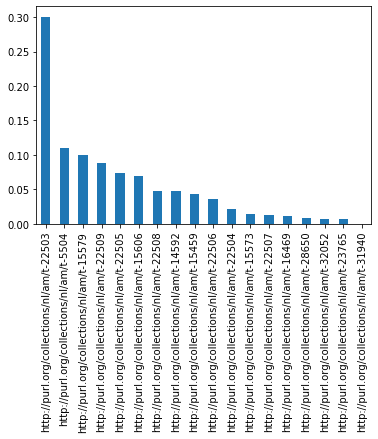

In [63]:
all.label_original.value_counts(normalize=True).plot(kind='bar')

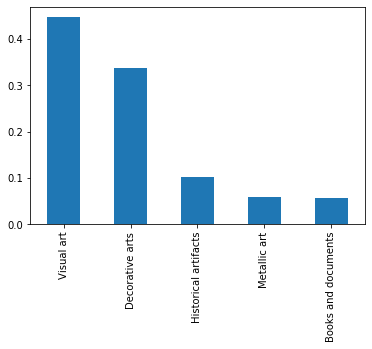

In [127]:
all.cls_label.value_counts(normalize=True).plot(kind='bar')
test.cls_label.value_counts(normalize=True).plot(kind='bar')

In [128]:
val.cls_label.value_counts().sum()

10000

In [129]:
val.cls_label.value_counts(normalize=False)

Visual art              4472
Decorative arts         3356
Historical artifacts    1027
Metallic art             576
Books and documents      569
Name: cls_label, dtype: int64

In [132]:
train.cls.value_counts().sum()

53423

In [56]:
counts = all.label_original.value_counts()

counts['http://purl.org/collections/nl/am/t-22503']

22048

In [35]:
g = rdf.Graph()

with gzip.open('am-combined.nt.gz', 'rb') as input:
    g.parse(input, format='nt')

In [57]:
for c in all.label_original.cat.categories:
    print('--', c)
    for s, p, o in g.triples((URIRef(c), SKOS.prefLabel, None)):
        print(o)

-- http://purl.org/collections/nl/am/t-14592
boekencollectie
-- http://purl.org/collections/nl/am/t-15459
meubelcollectie
-- http://purl.org/collections/nl/am/t-15573
glascollectie
-- http://purl.org/collections/nl/am/t-15579
textielcollectie
-- http://purl.org/collections/nl/am/t-15606
keramiekcollectie
-- http://purl.org/collections/nl/am/t-16469
onedele metalen collectie
-- http://purl.org/collections/nl/am/t-22503
prentencollectie
-- http://purl.org/collections/nl/am/t-22504
fotocollectie
-- http://purl.org/collections/nl/am/t-22505
tekeningencollectie
-- http://purl.org/collections/nl/am/t-22506
schilderijencollectie
-- http://purl.org/collections/nl/am/t-22507
beeldencollectie
-- http://purl.org/collections/nl/am/t-22508
edele metalencollectie
-- http://purl.org/collections/nl/am/t-22509
penningen- en muntencollectie
-- http://purl.org/collections/nl/am/t-23765
documentencollectie
-- http://purl.org/collections/nl/am/t-28650
archeologiecollectie
-- http://purl.org/collections/nl/

In [76]:

data = []
for c in all.label_original.cat.categories:
    url = c
    preflabel = next(g.triples((URIRef(c), SKOS.prefLabel, None)))[2]
    cnt = counts[c]
    data.append([url, preflabel, cnt])
    
classes = pd.DataFrame(data, columns=['resource', 'name', 'frequency'])

wlist = classes[classes.frequency >= 1000]
blist = classes[classes.frequency < 1000]
    
classes


,resource,name,frequency
0,http://purl.org/collections/nl/am/t-14592,boekencollectie,3479
1,http://purl.org/collections/nl/am/t-15459,meubelcollectie,3206
2,http://purl.org/collections/nl/am/t-15573,glascollectie,1028
3,http://purl.org/collections/nl/am/t-15579,textielcollectie,7366
4,http://purl.org/collections/nl/am/t-15606,keramiekcollectie,5152
5,http://purl.org/collections/nl/am/t-16469,onedele metalen collectie,797
6,http://purl.org/collections/nl/am/t-22503,prentencollectie,22048
7,http://purl.org/collections/nl/am/t-22504,fotocollectie,1563
8,http://purl.org/collections/nl/am/t-22505,tekeningencollectie,5455
9,http://purl.org/collections/nl/am/t-22506,schilderijencollectie,2672


In [70]:
wlist

,resource,name,frequency
0,http://purl.org/collections/nl/am/t-14592,boekencollectie,3479
1,http://purl.org/collections/nl/am/t-15459,meubelcollectie,3206
2,http://purl.org/collections/nl/am/t-15573,glascollectie,1028
3,http://purl.org/collections/nl/am/t-15579,textielcollectie,7366
4,http://purl.org/collections/nl/am/t-15606,keramiekcollectie,5152
6,http://purl.org/collections/nl/am/t-22503,prentencollectie,22048
7,http://purl.org/collections/nl/am/t-22504,fotocollectie,1563
8,http://purl.org/collections/nl/am/t-22505,tekeningencollectie,5455
9,http://purl.org/collections/nl/am/t-22506,schilderijencollectie,2672
11,http://purl.org/collections/nl/am/t-22508,edele metalencollectie,3533


In [71]:
blist

,resource,name,frequency
5,http://purl.org/collections/nl/am/t-16469,onedele metalen collectie,797
10,http://purl.org/collections/nl/am/t-22507,beeldencollectie,943
13,http://purl.org/collections/nl/am/t-23765,documentencollectie,533
14,http://purl.org/collections/nl/am/t-28650,archeologiecollectie,582
15,http://purl.org/collections/nl/am/t-31940,onedele collectie,3
16,http://purl.org/collections/nl/am/t-32052,maten en gewichtencollectie,536


In [72]:
test = pd.read_csv('test.tsv', sep='\t')

In [73]:
test.label_original.value_counts()


http://purl.org/collections/nl/am/t-22503    3038
http://purl.org/collections/nl/am/t-5504     1068
http://purl.org/collections/nl/am/t-15579     998
http://purl.org/collections/nl/am/t-22509     886
http://purl.org/collections/nl/am/t-22505     748
http://purl.org/collections/nl/am/t-15606     668
http://purl.org/collections/nl/am/t-14592     503
http://purl.org/collections/nl/am/t-22508     503
http://purl.org/collections/nl/am/t-15459     422
http://purl.org/collections/nl/am/t-22506     369
http://purl.org/collections/nl/am/t-22504     223
http://purl.org/collections/nl/am/t-15573     144
http://purl.org/collections/nl/am/t-22507     128
http://purl.org/collections/nl/am/t-16469     104
http://purl.org/collections/nl/am/t-32052      71
http://purl.org/collections/nl/am/t-23765      68
http://purl.org/collections/nl/am/t-28650      59
Name: label_original, dtype: int64

In [75]:
for s, p, o in g.triples((None, None, URIRef('http://purl.org/collections/nl/am/t-31940'))):
    print(s)
    for s, p, o in g.triples((s, None, None)):
        print('    ', p, o)
    

http://purl.org/collections/nl/am/proxy-73750
     http://purl.org/collections/nl/am/locat N89e43852fed445868649bdf305c54559
     http://purl.org/collections/nl/am/locat N20f73424b72148f58c935f27a47c76ff
     http://purl.org/collections/nl/am/material http://purl.org/collections/nl/am/t-12458
     http://purl.org/collections/nl/am/objectNumber 112.2
     http://purl.org/collections/nl/am/contentMotifGeneral http://purl.org/collections/nl/am/t-26761
     http://purl.org/collections/nl/am/associationPerson http://purl.org/collections/nl/am/p-65020
     http://purl.org/collections/nl/am/associationSubject http://purl.org/collections/nl/am/t-6307
     http://purl.org/collections/nl/am/associationPerson http://purl.org/collections/nl/am/p-71400
     http://purl.org/collections/nl/am/dimension N9a2d467ed3ea444aa9fc31ed8ccc368f
     http://purl.org/collections/nl/am/dimension N225c5f98698745598adf970cea033307
     http://purl.org/collections/nl/am/creditLine http://purl.org/collections/nl/am/